<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Numerical methods:  8. Optimisation
## Least-squares fit
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In this notebook, we discuss the **goodness-of-fit**, our **least-squares fit**, a statistics
fitting a prediction $p_i$ to observations $o_i$ for $i \in [1,n]$ data points, using
$$
\chi^2 = \sum\limits_{i=1}^{n} \left( \frac{o_i - p_i}{\sigma_i} \right)^2
$$
with $\sigma_i$ potential uncertainties of the observations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
# load own library
import numerics.change_fonts
numerics.change_fonts.change_fontsize()

We first define a function to fit, in this case a **straight line**:

In [2]:
def f(x,a,b):
    y = a + b*x
    return y

Then the **least-squares fit** as criterion:

In [3]:
def chi2(o,p):
    chi2 = 0
    for i in range(len(o)):
        chi2 = chi2 + (o[i]-p[i])**2
    return chi2

Finally, we play with fitting the straight line ...

In [4]:
def show_chi2(atry=1.5,btry=0.6):
    n=21; ntry = 11
    fig,ax = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=False,figsize=(15,4))
    ax[0].set_xlim([-2,2])
    ax[0].set_ylim([-1,3])
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')
    # real line
    
    atrue=1.;btrue=1.
    x = np.linspace(-2,2,n)
    ytrue = f(x,atrue,btrue)
    ax[0].plot(x,f(x,atrue,btrue),marker='o',markersize=10,linewidth=0,color='green',label='data')
    # test line
    ytry  = f(x,atry,btry)
    ax[0].plot(x,f(x,atry,btry),linewidth=4,color='black',label='prediction')
    
    # fit intercept a
    ax[1].set_xlim([-0.1,2.1])
    ax[1].set_ylim([-1,30])
    a = np.linspace(0,2,ntry)
    fita = np.zeros(ntry)
    for i in range(len(a)):
        y = f(x,a[i],btrue)
        fita[i] = chi2(ytrue,y)
        ax[0].plot(x,y,linewidth=1,linestyle='--',color='blue',alpha=0.5)
    ax[1].plot(a,fita,linewidth=1,color='blue')
    ax[1].plot(atry,chi2(ytrue,ytry),marker='o',markersize=10,color='black')
    ax[1].set_xlabel('a')
    ax[1].set_ylabel('$\chi^2$')
    
    # fit slope b
    ax[2].set_xlim([-0.1,2.1])
    ax[2].set_ylim([-1,30])
    b = np.linspace(0,2,ntry)
    fitb = np.zeros(ntry)
    for i in range(len(b)):
        y = f(x,atrue,b[i])
        fitb[i] = chi2(ytrue,y)
        ax[0].plot(x,y,linewidth=1,linestyle='-.',color='red',alpha=0.5)
    ax[2].plot(a,fitb,linewidth=1,color='red')
    ax[2].plot(btry,chi2(ytrue,ytry),marker='o',markersize=10,color='black')
    ax[2].set_xlabel('b')
    ax[2].set_ylabel('$\chi^2$')
    plt.tight_layout()

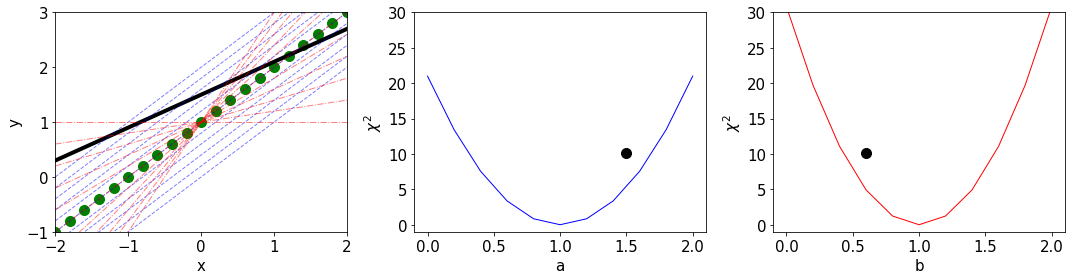

In [5]:
show_chi2()

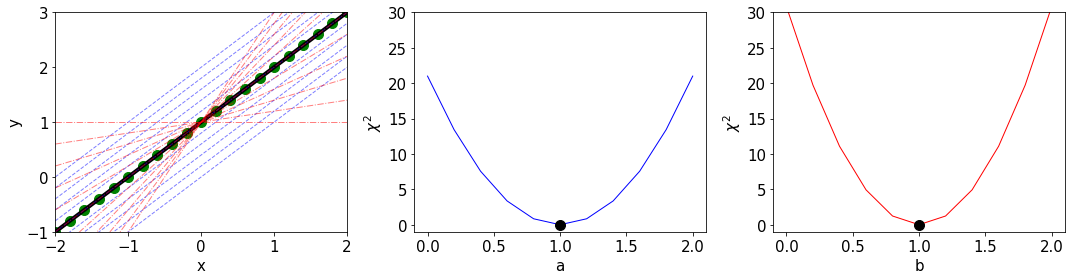

In [7]:
show_chi2(atry=1.,btry=1.)

In [6]:
interact(show_chi2, atry=(0,2,0.1),btry=(0,2,0.1));

interactive(children=(FloatSlider(value=1.5, description='atry', max=2.0), FloatSlider(value=0.6, description=…

----
[next>](Numerics_lab08_line.ipynb)